In [1]:
################################################
#
#  HOMEWORK1
#
###############################################

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [3]:
#
# PROBLEM 1.2
#
print("-------------------------------------------------")
print("                PROBLEM 1.2                      ")
print("-------------------------------------------------\n")
gamma_ray_data = pd.read_csv("Homework1/data_and_materials/gamma-ray.csv")
print("------------ Dataset: Gamma Ray CSV ", gamma_ray_data.shape)
print(gamma_ray_data.head(n=20))
print("------------ Info")
print(gamma_ray_data.info())
# The null zero Hypothesis H0 we want to test is:
# Lambda_i = Lambda_j = constant for each i,j in the dataset
#
# The alternative Hypothesis H1 is
# We have at least one pair i,j for which Lambda_i != Lambda_j 
#
# Assumptions:
# 1) we assume all samples are independent
# 2) we assume the number of gamma rays follows a Poisson distribution G_i follows Poisson(lambda_i)
#    From the MLE under H0 we get that the most likely value is 
print("----------------------------")
lambda_0 = gamma_ray_data['count'].sum() / gamma_ray_data['seconds'].sum()
gamma_ray_data['H1_lambda'] = gamma_ray_data['count'] / gamma_ray_data['seconds']
print("Lambda_0 as the value of lambda MLE under H0 is: ",lambda_0)
print("----------------------------")
#
# we want to build a log likelihood test
# so our test statistic is L(x) = -2 * log ( max(Likelihood under H0) / max(Likelihood under HA) ) 
# The test statistic behaves like a Chi square with N-1 degrees of freedom this gives me the regiection region for a Log likelihood test
from scipy.stats import chi2
from scipy.stats import poisson
df = 99 
alpha = 0.05
p_value = chi2.ppf([1-alpha],df=df)
print(f"Quantile of a Chisquare with {df} df for significance level alpha: {alpha} is : {p_value}")
print("And to confirm...")
print(f"CDF of a chisquare with {df} d.f. for value:{p_value} is : {chi2.cdf([p_value],df=df)}")
#
# 
print("----------------------------")
print("To find the value of the test statistics we need to:")
print("1) Find the numerator: this is the likelihood of the results under H0 lambda: {lambda_0}")
print("   we use scipy.stats poisson to get for each value in teh dataset the related probability")
print("   we add the values to the df as a new column: H0_p")
print("2) Find the denominator: this is the likelihood of the results under H1 lambda; in this case we compute")
print("   the values of each point using the lambda w got for that specific point")
print("   we add the values to the df as a new column")
print("   we add the values to the df as a new column: H1_p")
print("")
#
# note: mu here is lambda
from math import log
gamma_ray_data['H0_p'] = poisson.pmf(gamma_ray_data['count'].astype(int), mu=lambda_0)
gamma_ray_data['H1_p'] = poisson.pmf(gamma_ray_data['count'].astype(int), mu=gamma_ray_data['H1_lambda'])
#
#
Num = np.prod(gamma_ray_data['H0_p'])
Den = np.prod(gamma_ray_data['H1_p'])
#
#
print("Results are: ")
print(f"Numerator: {Num}")
print(f"Denominator: {Den}")
print(f"Log (Num/Den): {log(Num/Den)}" )
Tn = -2 * log(Num/Den)
print(f"Test statstic Tn: {Tn}")
print(f"CDF of a chisquare with {df} d.f. for value:{Tn} is : {chi2.cdf([Tn],df=df)}")


-------------------------------------------------
                PROBLEM 1.2                      
-------------------------------------------------

------------ Dataset: Gamma Ray CSV  (100, 2)
    seconds  count
0     116.0    0.0
1     112.0    0.0
2     160.0    0.0
3      51.5    0.0
4     102.0    1.0
5      77.4    0.0
6      14.5    0.0
7    1070.0    3.0
8      99.1    1.0
9      49.6    0.0
10     50.8    0.0
11     77.2    0.0
12    114.0    0.0
13    165.0    0.0
14    106.0    0.0
15     52.9    0.0
16    104.0    2.0
17     51.0    2.0
18     51.4    0.0
19    316.0    2.0
------------ Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seconds  100 non-null    float64
 1   count    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
----------------------------
Lambda_0 as the value of lambda MLE under H0 is:  0.00388

-------------------------------------------------
                PROBLEM 1.4                      
-------------------------------------------------

------------
Dataset: Golubc.sv shape: (3051, 39)
 # of genes: 3050
 # of cases: 38

Splitting df into 2 based on AML (1) or (0) ALL identifier from golub_cl.csv:

Columns for ALL: ['V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38']

AML Dataframe shape: (3051, 11)

-----------------------------
Adding Mean, Sample Standard Error columns, Mean Variance to all Dataframes..
Done..
--------------------------
Preparing for Welch Test setup..


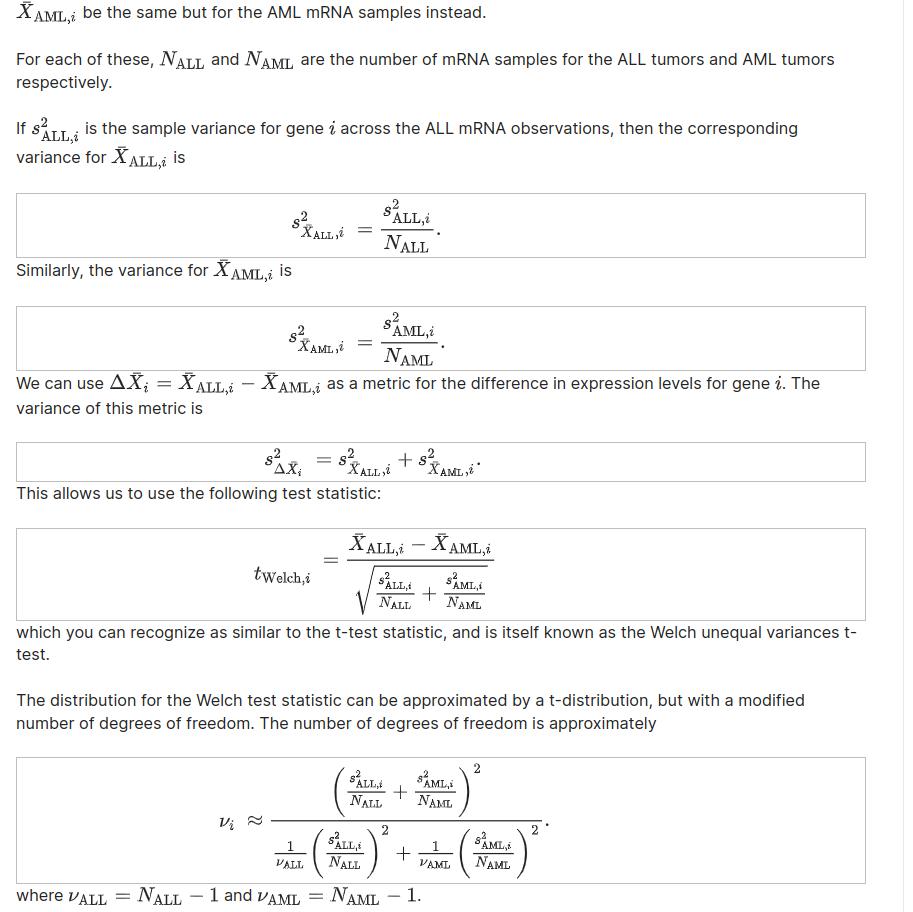

In [5]:
#
# PROBLEM 1.4
#
 #The data set golub consists of the expression levels of 3051 genes for 38 tumor mRNA samples. 
# Each tumor mRNA sample comes from one patient (i.e. 38 patients total),
# and 27 of these tumor samples correspond to acute lymphoblastic leukemia (ALL) 
# and the remaining 11 to acute myeloid leukemia (AML).
# Note:
# - golub.csv does not tell which patient is which category.. you have to refer to:
#    - golub_DESCRIPTION.txt: ALL code 0, AML code 1
#    - golub_cl.csv

df = pd.read_csv("Homework1/data_and_materials/golub_data/golub.csv")
golub_cl = pd.read_csv("Homework1/data_and_materials/golub_data/golub_cl.csv")
print("-------------------------------------------------")
print("                PROBLEM 1.4                      ")
print("-------------------------------------------------\n")
print("------------\nDataset: Golubc.sv shape:", df.shape)
print(f" # of genes: {df.shape[0] - 1}") # removing header column
print(f" # of cases: {df.shape[1] - 1}") # removing index column
# print(df.head(n=10))
#
# This prepares 2 filter:
# ALL and AML, they have True if we want the column in that poisition
# it actually seems we are not doing anything with the ALL code so commenting out related lines
column_filter_ALL = [  ]
column_filter_AML = [  ]
for index,x in enumerate(golub_cl['x']):
    if x == 1: 
        column_filter_AML.append(df.columns[index+1])
#    elif x == 0:
#        column_filter_ALL.append(df.columns[index+1])

print("\nSplitting df into 2 based on AML (1) or (0) ALL identifier from golub_cl.csv:\n")
#print(f"Columns for ALL: {column_filter_ALL}")
print(f"Columns for ALL: {column_filter_AML}\n")
df_AML = df.filter(column_filter_AML, axis=1) 
#df_ALL = df.filter(column_filter_ALL, axis=1)
#print(f"ALL Dataframe shape: {df_ALL.shape}")
print(f"AML Dataframe shape: {df_AML.shape}\n")
N_all = df.shape[1] - 1 
#N_ALL = df_ALL.shape[1]
N_AML = df_AML.shape[1]
#
#
print("-----------------------------")
# Find parameters: 
# X_all: mean for all the data
# X_AML: mean for the AML data
# X_ALL: mean for the ALL data
# S2_all: standard error for all the data
# S2_AML: standard error for AML data
# S2_ALL: standard error for ALL data
#
# we add each parameter to the related dataframework
# so at the end, th3 df will each have 2 new columns
#
#
#
# normally the mean would be computed per column, by setting axis = 1 we do it per row
# we also need to exclude the first column which is an index
# Note that df_AML and df_ALL don't have the index column.. so we can just go for it
print("Adding Mean, Sample Standard Error columns, Mean Variance to all Dataframes..")
df['X_all']  = df[df.columns.tolist()[1:]].mean(axis=1)
df_AML['X_AML'] = df_AML.mean(axis=1) 
#df_ALL['X_ALL'] = df_ALL.mean(axis=1) 
#
# we just added a column but we need to keep it out from the standard deviation calculation..
df['S_all']  = df[df.columns.tolist()[1:-1]].std(axis=1)
df_AML['S_AML'] = df_AML[df_AML.columns.tolist()[:-1]].std(axis=1) 
#df_ALL['S_ALL'] = df_ALL[df_ALL.columns.tolist()[:-1]].std(axis=1) 
#
# The mean variance is given by divigind the sample variance by N
df['XVariance_all']  = df['S_all'].apply(np.square) / N_all
df_AML['XVariance_AML'] = df_AML['S_AML'].apply(np.square) / N_AML
#df_ALL['XVariance_ALL'] = df_ALL['S_ALL'].apply(np.square) / N_ALL
print("Done..")
print("--------------------------")
#
# 
# The WELCH test is now based on the difference between
print("Preparing for Welch Test setup..")
from IPython.display import display
from PIL import Image
from math import sqrt
img = Image.open("Homework1/Welch_test_setup.png")
display(img)
#
welch_df = pd.DataFrame()
welch_df['Mean_diff'] = df['X_all']  - df_AML['X_AML']
welch_df['Mean_diff_Variance'] = df['XVariance_all']  + df_AML['XVariance_AML']
welch_df['XVariance_all'] = df['XVariance_all']
welch_df['XVariance_AML'] = df_AML['XVariance_AML']
welch_df['N_AML'] = 11
welch_df['N_all'] = 38

def T_Welch(row):
    return row['Mean_diff'] / sqrt(row['Mean_diff_Variance'])

def T_degree(row):
    num = (row['XVariance_all'] + row['XVariance_AML'])**2
    den1 =  (row['XVariance_all']**2) / (row['N_all'] -1 )
    den2 =  (row['XVariance_AML']**2) / (row['N_AML'] -1 )
    # return the integer approximation
    return int(num/(den1 + den2))


welch_df['T_score'] = welch_df.apply(T_Welch, axis=1)
welch_df['T_approximated_df'] = welch_df.apply(T_degree, axis=1)


In [88]:
welch_df

,Mean_diff,Mean_diff_Variance,XVariance_all,XVariance_AML,N_AML,N_all,T_score,T_approximated_df
0,-0.349766,0.083546,0.009093,0.074453,11,38,-1.210079,12
1,-0.154804,0.058487,0.007370,0.051116,11,38,-0.640108,13
2,0.014167,0.040019,0.006579,0.033440,11,38,0.070818,14
3,0.120411,0.190265,0.077468,0.112796,11,38,0.276050,25
4,0.516265,0.233235,0.077967,0.155268,11,38,1.068997,21
...,...,...,...,...,...,...,...,...
3046,-0.003454,0.012698,0.002678,0.010019,11,38,-0.030653,15
3047,-0.040279,0.022306,0.011522,0.010783,11,38,-0.269695,32
3048,-0.197797,0.020421,0.005579,0.014843,11,38,-1.384140,18
3049,-0.011907,0.021640,0.006363,0.015277,11,38,-0.080941,19
